In [1]:
import pandas as pd
import numpy as np

In [6]:
csv_path = "/Users/robertjost/Fall_2025/rj_geos505/data/22288186_WapitiSouthTOTAL.xlsx - 22288186_WapitiSE.csv"
# create dataframe and assign datetime as index
# can't infer dates, to specify a unit
precip_df = pd.read_csv(csv_path,header=0,parse_dates=True)
precip_df

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment
0,1,05/20/25 08:00:00,0,0.00,NaN,NaN,NaN
1,2,05/20/25 09:06:15,1,0.01,NaN,NaN,NaN
2,3,05/20/25 09:08:31,2,0.02,NaN,NaN,NaN
3,4,05/20/25 09:12:06,3,0.03,NaN,NaN,NaN
4,5,05/20/25 09:14:43,4,0.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...
319,85,09/11/25 21:24:04,84,3.19,NaN,NaN,NaN
320,86,09/14/25 05:30:21,85,3.20,NaN,NaN,NaN
321,87,09/14/25 05:30:22,86,3.21,NaN,NaN,NaN
322,88,09/14/25 05:30:23,87,3.22,NaN,NaN,NaN


In [37]:
# create new field with datetime difference between timestamps
precip_df['date'] = precip_df['Date_Time_GMT-06:00'].dt.date
precip_df['delta_t_sec'] = precip_df.groupby('date')['Date_Time_GMT-06:00'].diff().dt.total_seconds()
precip_df['delta_t_sec'] = precip_df['delta_t_sec'].fillna(0)
precip_df.head()
# calculate precip intervals

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
0,1,2025-05-20 08:00:00,0,0.00,NaN,NaN,NaN,0.0,2025-05-20
1,2,2025-05-20 09:06:15,1,0.01,NaN,NaN,NaN,3975.0,2025-05-20
2,3,2025-05-20 09:08:31,2,0.02,NaN,NaN,NaN,136.0,2025-05-20
3,4,2025-05-20 09:12:06,3,0.03,NaN,NaN,NaN,215.0,2025-05-20
4,5,2025-05-20 09:14:43,4,0.04,NaN,NaN,NaN,157.0,2025-05-20


In [45]:
# group by the dates and select the august event
grouped = precip_df.groupby('date')
target_event = grouped.get_group(pd.Timestamp('2025-08-26').date())
for name, group in grouped:
    display(f'Group:{name}')
    display(group)

'Group:2025-05-20'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
0,1,2025-05-20 08:00:00,0,0.00,NaN,NaN,NaN,0.0,2025-05-20
1,2,2025-05-20 09:06:15,1,0.01,NaN,NaN,NaN,3975.0,2025-05-20
2,3,2025-05-20 09:08:31,2,0.02,NaN,NaN,NaN,136.0,2025-05-20
3,4,2025-05-20 09:12:06,3,0.03,NaN,NaN,NaN,215.0,2025-05-20
4,5,2025-05-20 09:14:43,4,0.04,NaN,NaN,NaN,157.0,2025-05-20


'Group:2025-05-22'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
5,6,2025-05-22 12:22:01,5,0.05,NaN,NaN,NaN,0.0,2025-05-22
6,7,2025-05-22 12:24:52,6,0.06,NaN,NaN,NaN,171.0,2025-05-22
7,8,2025-05-22 12:28:00,7,0.07,NaN,NaN,NaN,188.0,2025-05-22
8,9,2025-05-22 12:29:23,8,0.08,NaN,NaN,NaN,83.0,2025-05-22
9,10,2025-05-22 12:31:58,9,0.09,NaN,NaN,NaN,155.0,2025-05-22
10,11,2025-05-22 12:36:09,10,0.10,NaN,NaN,NaN,251.0,2025-05-22
11,12,2025-05-22 12:39:22,11,0.11,NaN,NaN,NaN,193.0,2025-05-22
12,13,2025-05-22 12:41:07,12,0.12,NaN,NaN,NaN,105.0,2025-05-22
13,14,2025-05-22 12:44:00,13,0.13,NaN,NaN,NaN,173.0,2025-05-22
14,15,2025-05-22 12:47:32,14,0.14,NaN,NaN,NaN,212.0,2025-05-22


'Group:2025-06-05'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
25,26,2025-06-05 19:45:10,25,0.25,NaN,NaN,NaN,0.0,2025-06-05


'Group:2025-06-11'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
26,27,2025-06-11 10:19:30,26,0.26,NaN,NaN,NaN,0.0,2025-06-11
27,28,2025-06-11 10:22:23,27,0.27,NaN,NaN,NaN,173.0,2025-06-11
28,29,2025-06-11 10:23:36,28,0.28,NaN,NaN,NaN,73.0,2025-06-11
29,30,2025-06-11 10:25:33,29,0.29,NaN,NaN,NaN,117.0,2025-06-11
30,31,2025-06-11 10:29:06,30,0.30,NaN,NaN,NaN,213.0,2025-06-11
31,32,2025-06-11 10:46:58,31,0.31,NaN,NaN,NaN,1072.0,2025-06-11
32,33,2025-06-11 10:54:05,32,0.32,NaN,NaN,NaN,427.0,2025-06-11
33,34,2025-06-11 10:57:07,33,0.33,NaN,NaN,NaN,182.0,2025-06-11
34,35,2025-06-11 10:57:57,34,0.34,NaN,NaN,NaN,50.0,2025-06-11
35,36,2025-06-11 10:58:30,35,0.35,NaN,NaN,NaN,33.0,2025-06-11


'Group:2025-06-20'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
50,51,2025-06-20 15:37:29,50,0.50,NaN,NaN,NaN,0.0,2025-06-20
51,52,2025-06-20 15:44:14,51,0.51,NaN,NaN,NaN,405.0,2025-06-20
52,53,2025-06-20 15:46:30,52,0.52,NaN,NaN,NaN,136.0,2025-06-20
53,54,2025-06-20 15:49:57,53,0.53,NaN,NaN,NaN,207.0,2025-06-20
54,55,2025-06-20 15:51:43,54,0.54,NaN,NaN,NaN,106.0,2025-06-20
55,56,2025-06-20 15:54:53,55,0.55,NaN,NaN,NaN,190.0,2025-06-20
56,57,2025-06-20 15:57:23,56,0.56,NaN,NaN,NaN,150.0,2025-06-20
57,58,2025-06-20 16:00:36,57,0.57,NaN,NaN,NaN,193.0,2025-06-20
58,59,2025-06-20 16:03:28,58,0.58,NaN,NaN,NaN,172.0,2025-06-20
59,60,2025-06-20 16:07:58,59,0.59,NaN,NaN,NaN,270.0,2025-06-20


'Group:2025-06-21'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
84,85,2025-06-21 00:09:39,84,0.84,NaN,NaN,NaN,0.0,2025-06-21
85,86,2025-06-21 08:40:06,85,0.85,NaN,NaN,NaN,30627.0,2025-06-21
86,87,2025-06-21 08:43:25,86,0.86,NaN,NaN,NaN,199.0,2025-06-21


'Group:2025-06-22'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
87,88,2025-06-22 10:47:02,87,0.87,NaN,NaN,NaN,0.0,2025-06-22
88,89,2025-06-22 10:49:17,88,0.88,NaN,NaN,NaN,135.0,2025-06-22
89,90,2025-06-22 10:53:04,89,0.89,NaN,NaN,NaN,227.0,2025-06-22
90,91,2025-06-22 10:55:29,90,0.90,NaN,NaN,NaN,145.0,2025-06-22
91,92,2025-06-22 11:00:01,91,0.91,NaN,NaN,NaN,272.0,2025-06-22
92,93,2025-06-22 11:03:07,92,0.92,NaN,NaN,NaN,186.0,2025-06-22
93,94,2025-06-22 11:07:03,93,0.93,NaN,NaN,NaN,236.0,2025-06-22
94,95,2025-06-22 11:09:08,94,0.94,NaN,NaN,NaN,125.0,2025-06-22
95,96,2025-06-22 11:12:09,95,0.95,NaN,NaN,NaN,181.0,2025-06-22
96,97,2025-06-22 11:14:01,96,0.96,NaN,NaN,NaN,112.0,2025-06-22


'Group:2025-07-04'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
123,124,2025-07-04 04:42:15,123,1.23,NaN,NaN,NaN,0.0,2025-07-04
124,125,2025-07-04 04:44:35,124,1.24,NaN,NaN,NaN,140.0,2025-07-04
125,126,2025-07-04 04:50:13,125,1.25,NaN,NaN,NaN,338.0,2025-07-04
126,127,2025-07-04 04:54:54,126,1.26,NaN,NaN,NaN,281.0,2025-07-04
127,128,2025-07-04 04:59:39,127,1.27,NaN,NaN,NaN,285.0,2025-07-04
...,...,...,...,...,...,...,...,...,...
230,231,2025-07-04 16:22:43,230,2.30,NaN,NaN,NaN,139.0,2025-07-04
231,232,2025-07-04 16:31:44,231,2.31,NaN,NaN,NaN,541.0,2025-07-04
232,233,2025-07-04 16:35:05,232,2.32,NaN,NaN,NaN,201.0,2025-07-04
233,234,2025-07-04 16:44:19,233,2.33,NaN,NaN,NaN,554.0,2025-07-04


'Group:2025-07-05'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
235,1,2025-07-05 12:00:00,0,2.35,NaN,NaN,NaN,0.0,2025-07-05


'Group:2025-07-26'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
236,2,2025-07-26 18:11:15,1,2.36,NaN,NaN,NaN,0.0,2025-07-26
237,3,2025-07-26 18:23:11,2,2.37,NaN,NaN,NaN,716.0,2025-07-26
238,4,2025-07-26 19:16:12,3,2.38,NaN,NaN,NaN,3181.0,2025-07-26


'Group:2025-07-29'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
239,5,2025-07-29 18:02:48,4,2.39,NaN,NaN,NaN,0.0,2025-07-29
240,6,2025-07-29 18:22:39,5,2.40,NaN,NaN,NaN,1191.0,2025-07-29


'Group:2025-08-02'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
241,7,2025-08-02 18:16:44,6,2.41,NaN,NaN,NaN,0.0,2025-08-02
242,8,2025-08-02 18:20:37,7,2.42,NaN,NaN,NaN,233.0,2025-08-02
243,9,2025-08-02 18:25:50,8,2.43,NaN,NaN,NaN,313.0,2025-08-02


'Group:2025-08-03'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
244,10,2025-08-03 23:40:30,9,2.44,NaN,NaN,NaN,0.0,2025-08-03
245,11,2025-08-03 23:43:31,10,2.45,NaN,NaN,NaN,181.0,2025-08-03
246,12,2025-08-03 23:44:55,11,2.46,NaN,NaN,NaN,84.0,2025-08-03
247,13,2025-08-03 23:48:03,12,2.47,NaN,NaN,NaN,188.0,2025-08-03
248,14,2025-08-03 23:49:01,13,2.48,NaN,NaN,NaN,58.0,2025-08-03
249,15,2025-08-03 23:53:16,14,2.49,0.06,0.06,NaN,255.0,2025-08-03


'Group:2025-08-04'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
250,16,2025-08-04 05:15:34,15,2.5,NaN,NaN,NaN,0.0,2025-08-04


'Group:2025-08-17'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
251,17,2025-08-17 12:35:23,16,2.51,NaN,NaN,NaN,0.0,2025-08-17


'Group:2025-08-25'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
252,18,2025-08-25 17:16:49,17,2.52,NaN,NaN,NaN,0.0,2025-08-25
253,19,2025-08-25 17:19:46,18,2.53,NaN,NaN,NaN,177.0,2025-08-25
254,20,2025-08-25 17:22:10,19,2.54,NaN,NaN,NaN,144.0,2025-08-25


'Group:2025-08-26'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
255,21,2025-08-26 16:15:02,20,2.55,NaN,NaN,NaN,0.0,2025-08-26
256,22,2025-08-26 16:20:35,21,2.56,NaN,NaN,NaN,333.0,2025-08-26
257,23,2025-08-26 16:21:55,22,2.57,NaN,NaN,NaN,80.0,2025-08-26
258,24,2025-08-26 16:22:24,23,2.58,NaN,NaN,NaN,29.0,2025-08-26
259,25,2025-08-26 16:23:00,24,2.59,NaN,NaN,NaN,36.0,2025-08-26
260,26,2025-08-26 16:23:34,25,2.60,NaN,NaN,NaN,34.0,2025-08-26
261,27,2025-08-26 16:24:32,26,2.61,NaN,NaN,NaN,58.0,2025-08-26
262,28,2025-08-26 16:24:57,27,2.62,NaN,NaN,NaN,25.0,2025-08-26
263,29,2025-08-26 16:25:42,28,2.63,NaN,NaN,NaN,45.0,2025-08-26
264,30,2025-08-26 16:26:08,29,2.64,NaN,NaN,NaN,26.0,2025-08-26


'Group:2025-08-31'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
296,62,2025-08-31 11:59:49,61,2.96,NaN,NaN,NaN,0.0,2025-08-31
297,63,2025-08-31 11:59:58,62,2.97,NaN,NaN,NaN,9.0,2025-08-31
298,64,2025-08-31 12:00:00,63,2.98,NaN,NaN,NaN,2.0,2025-08-31
299,65,2025-08-31 12:00:06,64,2.99,NaN,NaN,NaN,6.0,2025-08-31
300,66,2025-08-31 12:00:08,65,3.00,NaN,NaN,NaN,2.0,2025-08-31
301,67,2025-08-31 12:00:11,66,3.01,NaN,NaN,NaN,3.0,2025-08-31
302,68,2025-08-31 12:00:15,67,3.02,NaN,NaN,NaN,4.0,2025-08-31
303,69,2025-08-31 12:00:23,68,3.03,NaN,NaN,NaN,8.0,2025-08-31
304,70,2025-08-31 12:00:30,69,3.04,NaN,NaN,NaN,7.0,2025-08-31
305,71,2025-08-31 12:00:32,70,3.05,NaN,NaN,NaN,2.0,2025-08-31


'Group:2025-09-11'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
319,85,2025-09-11 21:24:04,84,3.19,NaN,NaN,NaN,0.0,2025-09-11


'Group:2025-09-14'

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
320,86,2025-09-14 05:30:21,85,3.20,NaN,NaN,NaN,0.0,2025-09-14
321,87,2025-09-14 05:30:22,86,3.21,NaN,NaN,NaN,1.0,2025-09-14
322,88,2025-09-14 05:30:23,87,3.22,NaN,NaN,NaN,1.0,2025-09-14
323,89,2025-09-14 05:30:25,88,3.23,NaN,NaN,NaN,2.0,2025-09-14


In [44]:
target_event.drop(target_event.index[-1], inplace=True) # drop the row after the debris flow occurred
target_event = target_event.reset_index(drop=True)
target_event

,ID,Date_Time_GMT-06:00,event,precip_accum_in,event_total_in,event_i30_in,comment,delta_t_sec,date
0,21,2025-08-26 16:15:02,20,2.55,NaN,NaN,NaN,0.0,2025-08-26
1,22,2025-08-26 16:20:35,21,2.56,NaN,NaN,NaN,333.0,2025-08-26
2,23,2025-08-26 16:21:55,22,2.57,NaN,NaN,NaN,80.0,2025-08-26
3,24,2025-08-26 16:22:24,23,2.58,NaN,NaN,NaN,29.0,2025-08-26
4,25,2025-08-26 16:23:00,24,2.59,NaN,NaN,NaN,36.0,2025-08-26
5,26,2025-08-26 16:23:34,25,2.60,NaN,NaN,NaN,34.0,2025-08-26
6,27,2025-08-26 16:24:32,26,2.61,NaN,NaN,NaN,58.0,2025-08-26
7,28,2025-08-26 16:24:57,27,2.62,NaN,NaN,NaN,25.0,2025-08-26
8,29,2025-08-26 16:25:42,28,2.63,NaN,NaN,NaN,45.0,2025-08-26
9,30,2025-08-26 16:26:08,29,2.64,NaN,NaN,NaN,26.0,2025-08-26


In [43]:
event_timedelta = target_event['Date_Time_GMT-06:00'].diff().dt.total_seconds()
event_duration = (event_timedelta.sum()) / 60
event_duration

np.float64(18.2)

In [74]:
def analyze(group, drop_last_for=None):
    g = group.reset_index(drop=True)
    group_date = g['Date_Time_GMT-06:00'].dt.date.iloc[0]

    # Drop the last row only for the target date
    if drop_last_for and group_date == drop_last_for:
        g = g.iloc[:-1]

    # Example analysis
    total_precip = g['precip_accum_in'].iloc[-1] - g['precip_accum_in'].iloc[0]
    duration_sec = (g['Date_Time_GMT-06:00'].iloc[-1] - g['Date_Time_GMT-06:00'].iloc[0]).total_seconds()
    duration_hr = duration_sec / 3600

    return pd.Series({'total_precip': total_precip, 'duration_sec': duration_sec, 'duration_hr': f"{duration_hr:.3f}"})

target_date = pd.Timestamp('2025-08-26').date()
daily_summary = grouped.apply(analyze, drop_last_for=target_date).reset_index()
daily_summary = daily_summary[daily_summary['total_precip'] != 0].reset_index(drop=True)
#daily_summary['date_str'] = f'{daily_summary['date'].dt.month}-{daily_summary['date'].dt.day}'
print(daily_summary)


          date  total_precip  duration_sec duration_hr
0   2025-05-20          0.04        4483.0       1.245
1   2025-05-22          0.19        6308.0       1.752
2   2025-06-11          0.23       15693.0       4.359
3   2025-06-20          0.33       28249.0       7.847
4   2025-06-21          0.02       30826.0       8.563
5   2025-06-22          0.35       46053.0      12.793
6   2025-07-04          1.11       43960.0      12.211
7   2025-07-26          0.02        3897.0       1.083
8   2025-07-29          0.01        1191.0       0.331
9   2025-08-02          0.02         546.0       0.152
10  2025-08-03          0.05         766.0       0.213
11  2025-08-25          0.02         321.0       0.089
12  2025-08-26          0.39        1092.0       0.303
13  2025-08-31          0.22         571.0       0.159
14  2025-09-14          0.03           4.0       0.001


/var/folders/40/_y1x921s259fffptgdb3lw1m0000gn/T/ipykernel_44610/1702056949.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_summary = grouped.apply(analyze, drop_last_for=target_date).reset_index()


In [80]:
# Ensure the column is datetime
daily_summary['date'] = pd.to_datetime(daily_summary['date'])

# Create MM-DD string
daily_summary['month_day'] = daily_summary['date'].dt.strftime('%m-%d')

print(daily_summary[['date', 'month_day']].head())

        date month_day
0 2025-05-20     05-20
1 2025-05-22     05-22
2 2025-06-11     06-11
3 2025-06-20     06-20
4 2025-06-21     06-21


In [55]:
import matplotlib.pyplot as plt


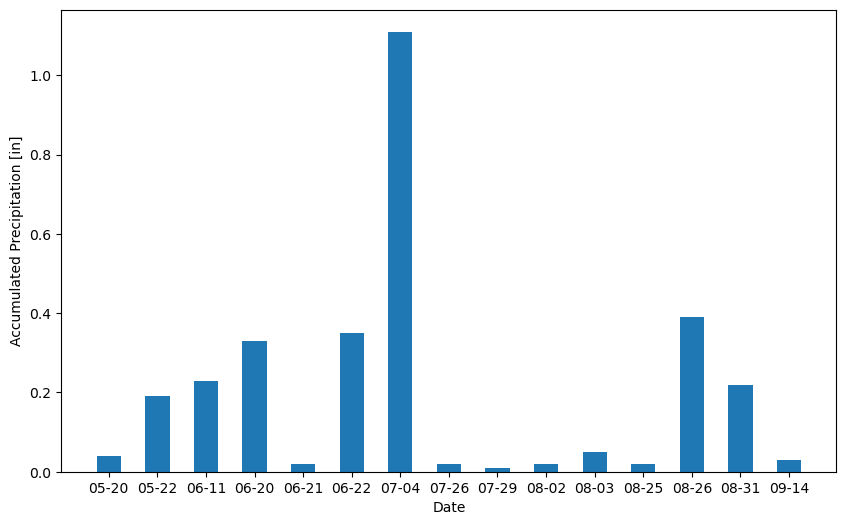

In [82]:
bar_width = 0.5
x_pos = np.arange(len(daily_summary['date']))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_pos, daily_summary['total_precip'], width=bar_width, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(daily_summary['month_day'])
ax.set_xlabel('Date')
ax.set_ylabel('Accumulated Precipitation [in]')
plt.show()
